# **Classifying Recycling Material**
##Built by EcoClim Solutions

---
Garbage classification involves separating wastes according to how it's handled or processed. It's important for recycling as some materials are recyclable and others are not.


![AI Logo](https://ecoclimsolutions.files.wordpress.com/2023/12/rmcai.png?resize=219%2C219)
---

The objective of the notebook is to build a model that helps to classify recycling material, basically, solve a **multi-class single-label classification problem**.

---
Do not copy any/all parts of this code without direct permissions from the official company.  Enjoy!

#**1. Dataset**

### **About The Data And Datasets:**
* The [Dataset](https://drive.google.com/file/d/1brl6_ul9a0ILv0bylr_7ggrIQIhEBAx6/view?usp=drive_link) used is an altered version of a [Dataset](https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification) found in Kaggle
* The total number of images in the dataset is .
* The dataset has 6 different classes.
* **The number of images in each class varies**.
  * The **_Paper_** class has 594 images
  * The  **_Cardboard_** class has 403 images
  * The  **_Plastic_** class has 482 images
  * The  **_Glass_** class has 501 images
  * The  **_Metal_** class has 410 images
  * The  **_Trash_** class has 137 images
* **The dataset is imbalanced**, each class has a different number of images, which may interfere with this models precision
* The quality of images in the dataset can be improved, some images in _**paper**_ and _**cardboard**_ are basically the same, the same happens with _**plastic**_ and _**glass**_,

* **All the images in this dataset are taken with a white background which lowers the precision of this model**

* **The dataset contains some outliers and mislabeled data.** There is some _**plastic**_ labeled as _**paper**_.
* The `training_ds` contains 64 batches of 32 images each, each image of size 256x256 colored, the total number of images in the `training_ds` is 2022. It use the default values of `image_dataset_from_directory()` method.
* The `validation_ds` contains 16 batches of 32 images each, each image of size 256x256 colored, the total number of images in the `validation_ds` is 505. We use the default values of `image_dataset_from_directory()` method.

##**1.1 Importing Dependencies And Mounting Drive**





In [ ]:
#Importing Dependencies
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1.2 Downloading and Storing the Dataset**

In [ ]:
#Downloading Dataset
!gdown 1brl6_ul9a0ILv0bylr_7ggrIQIhEBAx6

Downloading...
From: https://drive.google.com/uc?id=1brl6_ul9a0ILv0bylr_7ggrIQIhEBAx6
To: /content/Dataset.zip
100% 42.7M/42.7M [00:00<00:00, 74.8MB/s]


In [ ]:
#Changing location of Dataset
!mv /content/Dataset.zip /content/drive/MyDrive/Dataset.zip

In [ ]:
#Unizipping the Datset
!unzip '/content/drive/MyDrive/Dataset.zip' -d my_data

Archive:  /content/drive/MyDrive/Dataset.zip
   creating: my_data/Dataset/cardboard/
  inflating: my_data/Dataset/cardboard/cardboard1.jpg  
  inflating: my_data/Dataset/cardboard/cardboard10.jpg  
  inflating: my_data/Dataset/cardboard/cardboard100.jpg  
  inflating: my_data/Dataset/cardboard/cardboard101.jpg  
  inflating: my_data/Dataset/cardboard/cardboard102.jpg  
  inflating: my_data/Dataset/cardboard/cardboard103.jpg  
  inflating: my_data/Dataset/cardboard/cardboard104.jpg  
  inflating: my_data/Dataset/cardboard/cardboard105.jpg  
  inflating: my_data/Dataset/cardboard/cardboard106.jpg  
  inflating: my_data/Dataset/cardboard/cardboard107.jpg  
  inflating: my_data/Dataset/cardboard/cardboard108.jpg  
  inflating: my_data/Dataset/cardboard/cardboard109.jpg  
  inflating: my_data/Dataset/cardboard/cardboard11.jpg  
  inflating: my_data/Dataset/cardboard/cardboard110.jpg  
  inflating: my_data/Dataset/cardboard/cardboard111.jpg  
  inflating: my_data/Dataset/cardboard/cardboard1

In [ ]:
#Declaring the Dataset's path as a variable
data_dir = 'my_data/Dataset/'

##**1.3 Reviewing the Dataset**

In [ ]:
#Reviewing number of files and directories in the Dataset
total_dir = len(os.listdir(data_dir))
total_files = 0

for dirname, _, filenames in os.walk(data_dir):
    print('counting:', dirname)
    files_counter = 0
    for file in filenames:
        files_counter += 1
    total_files += files_counter
    print('total files in dir:', files_counter)

print('--------')
print('total number of files',total_files)
print('total number of directories',total_dir)

counting: my_data/Dataset/
total files in dir: 5
counting: my_data/Dataset/paper
total files in dir: 594
counting: my_data/Dataset/metal
total files in dir: 410
counting: my_data/Dataset/trash
total files in dir: 137
counting: my_data/Dataset/plastic
total files in dir: 482
counting: my_data/Dataset/cardboard
total files in dir: 403
counting: my_data/Dataset/glass
total files in dir: 501
--------
total number of files 2532
total number of directories 11


**Key Insight:**
* Datasets created using `image_dataset_from_directory()` defaults.
* Image size: _256x256_, batch size: _32_.
* Refer to [docs](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) for default values.

##**1.4 Adjusting The Dataset**

In [ ]:
#Creating the Training and Validation Datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=100
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=100
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


##**1.5 Validating The Dataset**

In [ ]:
#Geting class names
class_names = train_ds.class_names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


##**1.6 Viewing And Inspecting The Dataset**

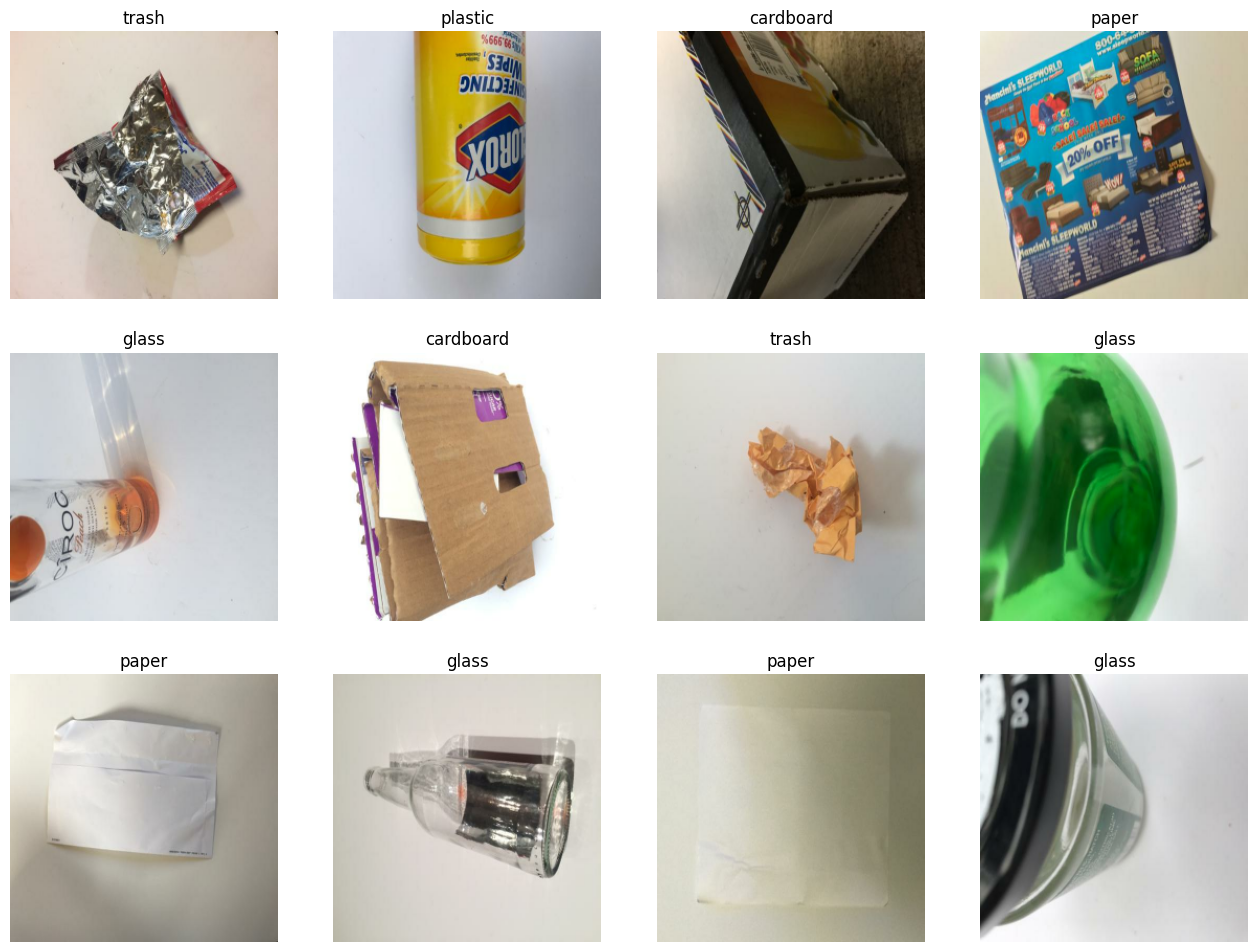

In [ ]:
#Viewing some images from the Training Dataset
plt.figure(figsize=(16, 16))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

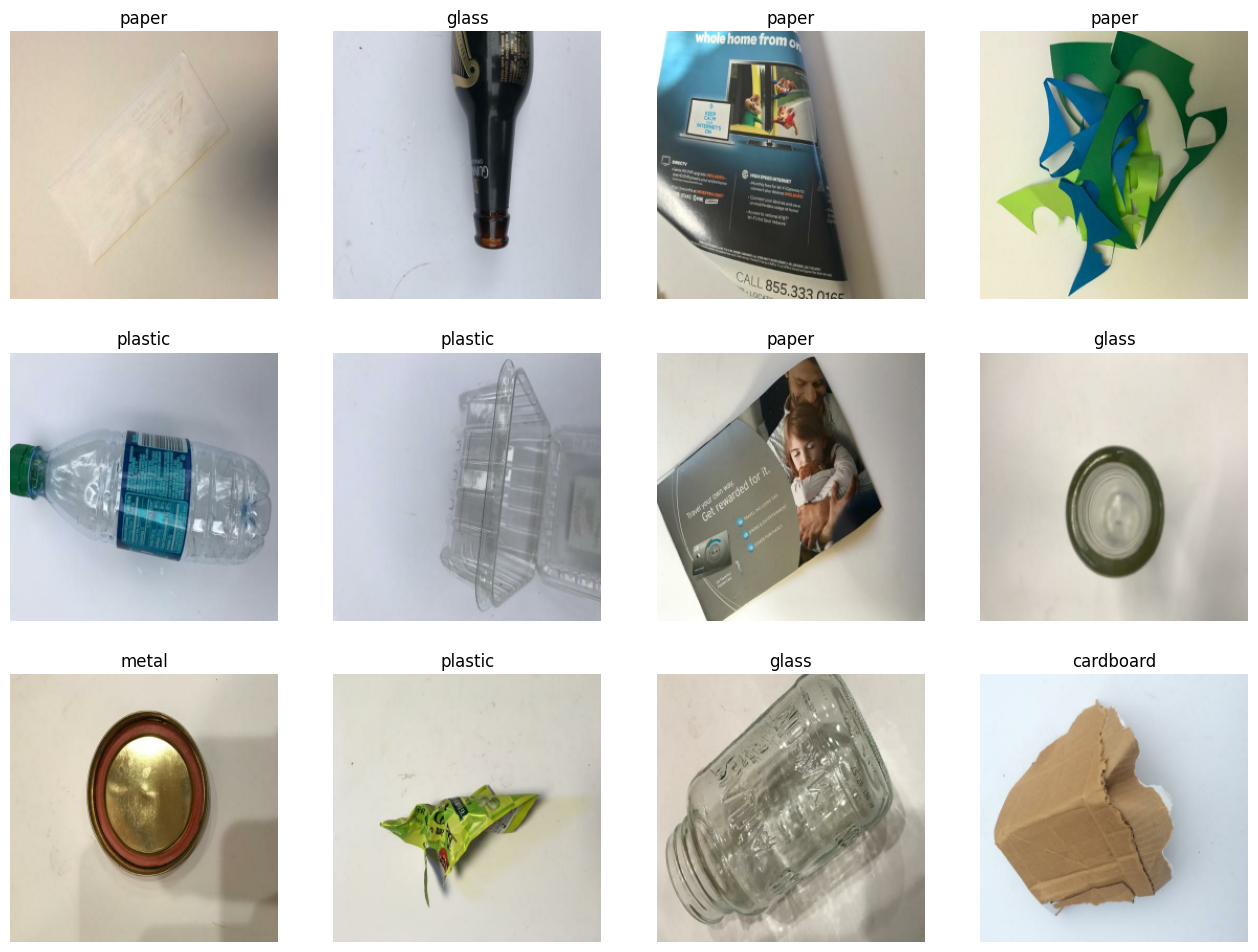

In [ ]:
#Viewing some images from the Validation Dataset
plt.figure(figsize=(16, 16))
for images, labels in validation_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
#Inspect the Training Dataset
train_batch = train_ds.as_numpy_iterator().next()

print('total of batches:',len(train_ds))
print('images batch shape:',train_batch[0].shape)
print('labels batch shape:',train_batch[1].shape)

total of batches: 64
images batch shape: (32, 256, 256, 3)
labels batch shape: (32,)


In [ ]:
#Inspect the Validation Dataset
validation_batch = validation_ds.as_numpy_iterator().next()

print('total of batches:',len(validation_ds))
print('images batch shape:',validation_batch[0].shape)
print('labels batch shape:',validation_batch[1].shape)

total of batches: 16
images batch shape: (32, 256, 256, 3)
labels batch shape: (32,)


# **2. Neural Network**

##**2.1 Instantiating ResNet50V2 for fine-tuning**

In [ ]:
#Instantiating the base model
input_shape = (256,256,3)
base_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=input_shape)

#Making the layers of the model trainable
base_model.trainable = True

94668760/94668760 [==============================] - 0s 0us/step


**Key Points:**
* Employing transfer learning for classification.
* Utilizing ResNet50V2 pretrained on ImageNet.
* Default instantiation; refer to [docs](https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50V2) for details.
* Enabling training on `base_model` layers tunes its "generic" features to dataset-specific characteristics.

##**2.2 Reviewing the Model**

In [ ]:
#Reviewing the base model architecture
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 130, 130, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
#Finding the tunning layer and its index
tuning_layer_name = 'conv5_block1_preact_bn'
tuning_layer = base_model.get_layer(tuning_layer_name)
tuning_index = base_model.layers.index(tuning_layer)

#Freezing all the layers before the tuning layer
for layer in base_model.layers[:tuning_index]:
    layer.trainable =  False

**Key Considerations:**
* Reviewed `base_model` for tuning layer.
* Chose _'conv5_block1_preact_bn'_ for optimal size, parameters, and position.
* Freezing layers above to preserve weights.
* Training layers below to fine-tune with `training_ds` features.

##**2.3 Changing Orientation of Images for Better Precision**

In [ ]:
#Creating a data augmentation stage with horizontal and vertical flipping, rotations and zooms
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
], name='data_augmentation')

**Key Observations:**
* Resized images via `image_size` in `image_dataset_from_directory()`.
* Resizing logic can be part of model or preprocessing group.
* Pixel values rescaled to _[-1,1]_ for base model compatibility.

##**2.4 Creating the architecture**

In [ ]:
#Creating the neural network architecture
import tensorflow as tf
model = tf.keras.Sequential([
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(6, activation='softmax')
])

learning_rate = 0.00001
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    metrics=['accuracy']
)

NameError: name 'data_augmentation' is not defined

##**2.5 Training the Model**

In [ ]:
#Training the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=250
)

Epoch 1/250
64/64 [==============================] - 36s 283ms/step - loss: 1.7032 - accuracy: 0.3333 - val_loss: 1.2749 - val_accuracy: 0.5307
Epoch 2/250
64/64 [==============================] - 13s 196ms/step - loss: 1.1829 - accuracy: 0.5915 - val_loss: 0.9286 - val_accuracy: 0.6792
Epoch 3/250
64/64 [==============================] - 13s 199ms/step - loss: 0.9260 - accuracy: 0.6973 - val_loss: 0.7629 - val_accuracy: 0.7485
Epoch 4/250
64/64 [==============================] - 13s 201ms/step - loss: 0.7615 - accuracy: 0.7547 - val_loss: 0.6555 - val_accuracy: 0.7802
Epoch 5/250
64/64 [==============================] - 13s 201ms/step - loss: 0.6581 - accuracy: 0.7868 - val_loss: 0.5903 - val_accuracy: 0.7861
Epoch 6/250
64/64 [==============================] - 13s 192ms/step - loss: 0.5975 - accuracy: 0.8056 - val_loss: 0.5448 - val_accuracy: 0.8119
Epoch 7/250
64/64 [==============================] - 13s 193ms/step - loss: 0.5185 - accuracy: 0.8348 - val_loss: 0.4971 - val_accuracy:

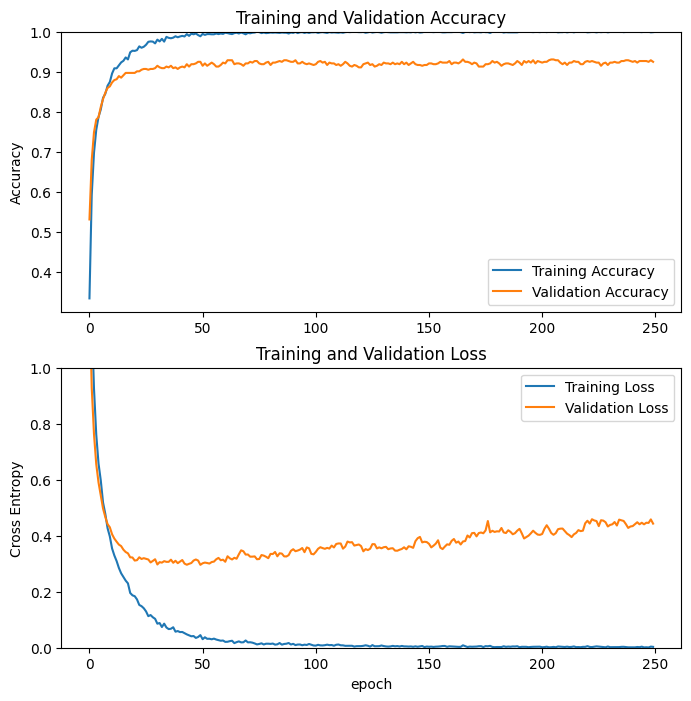

In [ ]:
#Visualizing the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#Plotting accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

#Plotting loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# **3. Model Evaluation**

##**3.1 Evaluating the Model**

In [ ]:
#Verifying the performance of the model
loss, accuracy = model.evaluate(validation_ds)
print('Test accuracy :', accuracy)
print('Test loss:', loss)

16/16 [==============================] - 2s 107ms/step - loss: 0.4432 - accuracy: 0.9248
Test accuracy : 0.9247524738311768
Test loss: 0.4432383179664612


##**3.2 Saving the Model**

In [ ]:
model.save('/content/drive/MyDrive/EcoIdentify_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **4. Inferencing**

## **4.1. Inference Using Known Data**

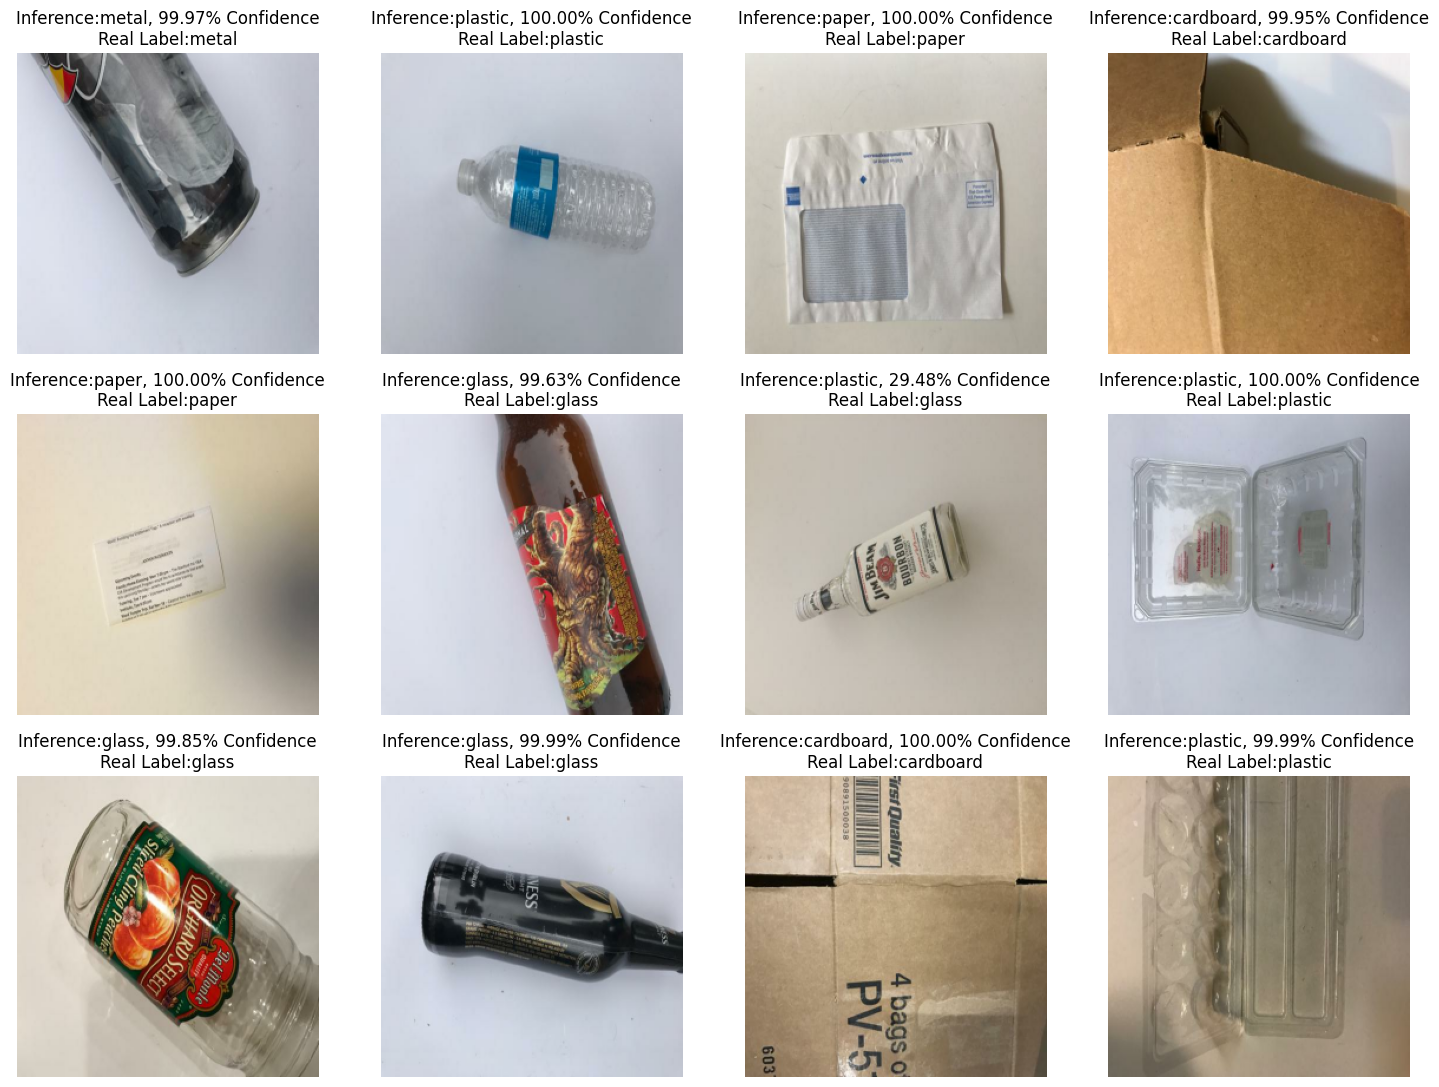

In [ ]:
#Get a batch from Validation Dataset to do some inferencing
image_batch, label_batch = validation_ds.as_numpy_iterator().next()

#Inference
inference = model.predict_on_batch(image_batch)

#Viewing images and labels
plt.figure(figsize=(18, 18))
for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title('Inference:{}, {:.2f}% Confidence\nReal Label:{}'
              .format(class_names[np.argmax(inference[i])], 100 * np.max(inference[i]), class_names[label_batch[i]]))
    plt.axis("off")

**Note:** The data is considered as _'known data'_ because it was involved during the training,  used for validation.

#**Key Findings:**
* Model achieves ~90% accuracy.
* Leveraged Data Augmentation and Transfer Learning.
* Some overfitting due to small training set.
* Inference generally accurate, but room for improvement.
* Opportunities for enhancing data and fine-tuning architecture.